In [15]:
%load_ext autoreload
%autoreload 2
!RUST_BACKTRACE=1 cargo run -- ../models/rover.mo -t ../templates/casadi_daebuilder.jinja > gen/rover_casadi_daebuilder.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
    Finished ]8;;https://doc.rust-lang.org/cargo/reference/profiles.html#default-profiles\`dev` profile [unoptimized + debuginfo]]8;;\ target(s) in 0.09s
     Running `/home/jgoppert/git/rumoca/target/debug/rumoca ../models/rover.mo -t ../templates/casadi_daebuilder.jinja`


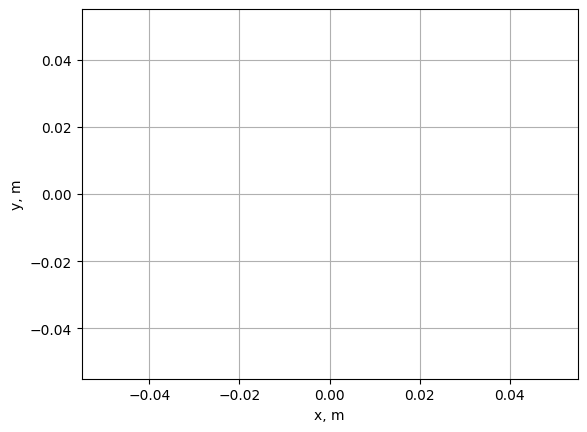

In [20]:
import gen.rover_casadi_daebuilder as rover
import numpy as np
import matplotlib.pyplot as plt

model = rover.Model('rover')

def f_u(t):
    u = np.zeros(len(model.u))
    u[model.u_index['thr']] = np.sin(t)
    u[model.u_index['str']] = np.cos(t)
    return u


tgrid, res = model.simulate(t0=0, tf=10, dt=0.01)

plt.figure()
plt.plot(res['xf'][0, :], res['xf'][1, :])
plt.xlabel('x, m')
plt.ylabel('y, m')
plt.grid()


In [18]:
res['xf']

DM(
[[0, 0, 0, ..., 0, 0, 0], 
 [0, 0, 0, ..., 0, 0, 0], 
 [0, 0, 0, ..., 0, 0, 0], 
 [0, 0, 0, ..., 0, 0, 0], 
 [0, 0, 0, ..., 0, 0, 0]])

In [21]:
import rover_node

In [25]:
try:
    import rover_node
    rover_node.run()
except ImportError as e:
    print("rover_node import error e, skipping ROS node", e)
    pass

[INFO] [1762543516.222198360] [rover_node]: pos x=0.000 y=0.000 yaw=0.000 thr=0.00 ste=0.00
[INFO] [1762543516.271764577] [rover_node]: pos x=0.000 y=0.000 yaw=0.000 thr=0.00 ste=0.00
[INFO] [1762543516.321710724] [rover_node]: pos x=0.000 y=0.000 yaw=0.000 thr=0.00 ste=0.00
[INFO] [1762543516.371728792] [rover_node]: pos x=0.000 y=0.000 yaw=0.000 thr=0.00 ste=0.00
[INFO] [1762543516.421772479] [rover_node]: pos x=0.000 y=0.000 yaw=0.000 thr=0.00 ste=0.00
[INFO] [1762543516.471719796] [rover_node]: pos x=0.000 y=0.000 yaw=0.000 thr=0.00 ste=0.00
[INFO] [1762543516.521731904] [rover_node]: pos x=0.000 y=0.000 yaw=0.000 thr=0.00 ste=0.00
[INFO] [1762543516.571712171] [rover_node]: pos x=0.000 y=0.000 yaw=0.000 thr=0.00 ste=0.00
[INFO] [1762543516.621691688] [rover_node]: pos x=0.000 y=0.000 yaw=0.000 thr=0.00 ste=0.00
[INFO] [1762543516.671608125] [rover_node]: pos x=0.000 y=0.000 yaw=0.000 thr=0.00 ste=0.00
[INFO] [1762543516.721860963] [rover_node]: pos x=0.000 y=0.000 yaw=0.000 thr=0.

RCLError: failed to shutdown: rcl_shutdown already called on the given context, at ./src/rcl/init.c:333

For visualization: In  another terminal run:

```bash
ros2 run rviz2 rviz2 --ros-args -p use_sim_time:=true
```m

Add rover_pose to view.


For control: In  another terminal run:

```bash
ros2 run joy joy_node --ros-args -p use_sim_time:=true
```